In [4]:
%matplotlib widget
%load_ext autoreload
%autoreload 2
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [7]:
import os
import sys
sys.path.insert(0, 'functions/')
from h5_tools import *

import numpy as np
import h5py as h5
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
# from Xana import Xana
# from Xana import Soq
# from Xana.XpcsAna import CorrFunc as G2
# from functions.slurm import submit_job
# import time
# import pickle
# from glob import glob
# import seaborn as sns
# import pandas as pd
# import lmfit

In [8]:
h5dir = '/cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/20220614/processed/h5-files/'
datadir = '/cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/'

# Load data

In [9]:
runname = 'ferritin_conc_gly_50_6'
datasetnumber = 5 # 4 # 230 K

In [10]:
filename = h5dir + f'{runname}_{datasetnumber:04d}.h5'
print(filename, "\nFile exists: ", os.path.isfile(filename))

/cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/20220614/processed/h5-files/ferritin_conc_gly_50_6_0005.h5 
File exists:  True


In [11]:
with h5.File(filename, 'a') as f: 
    # f.visititems(visit_func)
    print(f['xpcs'].keys())
    print(f['xpcs/ttcs'].keys())

<KeysViewHDF5 ['g2s', 'scans', 'ttcs']>
<KeysViewHDF5 ['q', 'times', 'ttc_avg_int', 'ttc_rep_qs_avg']>


In [54]:
g2s = load_data(filename, 'xpcs/g2s/g2s')
delay = load_data(filename, 'xpcs/g2s/delay')

In [12]:
# shape: (4, 11, 4990, 4990) 1min to laod
ttcs = load_data(filename, 'xpcs/ttcs/ttc_rep_qs_avg')
print(np.shape(ttcs))

(4, 11, 4990, 4990)


In [13]:
ttc_time = load_data(filename, 'xpcs/ttcs/times')
qv_ttc = load_data(filename, 'xpcs/ttcs/q')

# Plot TTCs

In [14]:
rep = 0
ttc_rep = ttcs[rep]
np.shape(ttc_rep)

(11, 4990, 4990)

In [15]:
qv_ttc

array([0.068, 0.108, 0.148, 0.188, 0.228, 0.268, 0.308, 0.348, 0.388,
       0.428, 0.468])

In [25]:
# cmap = mpl.cm.jet
import matplotlib as mpl
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

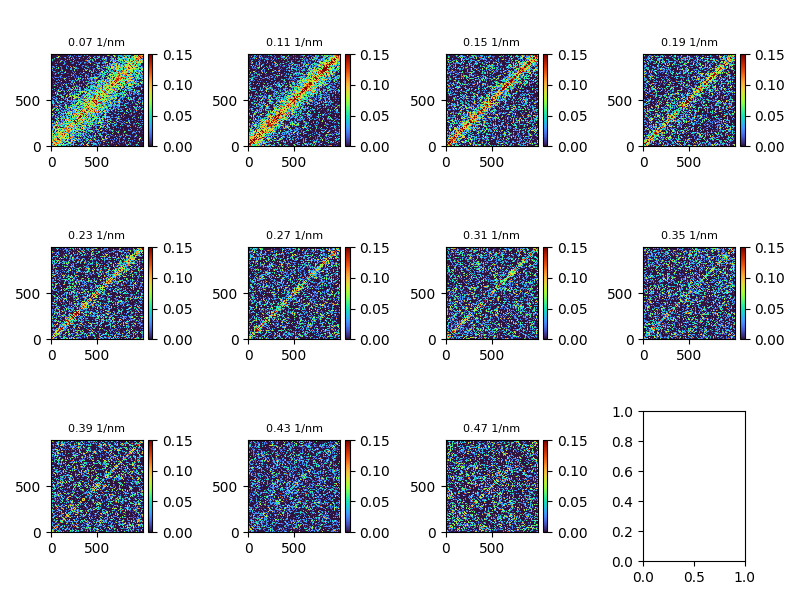

In [38]:
f, axs = plt.subplots(3,4, figsize=(8,6), tight_layout=True)
for i,q in enumerate(qv_ttc[:]):
    tlim = 1000
    ttc = ttc_rep[i][:tlim, :tlim]
    ax = axs.ravel()[i]
    vmin = np.mean(ttc[:500, -500:])
    ax.imshow(ttc-vmin, vmin=0, vmax=.15, origin='lower', cmap='turbo')
    ax.set_title(f'{qv_ttc[i]:.2f} 1/nm', fontsize=8)

    divider = make_axes_locatable(ax)
    cb1 = mpl.colorbar.ColorbarBase(divider.append_axes('right', size='5%', pad=0.05), cmap=mpl.cm.turbo,  orientation='vertical', norm=mpl.colors.Normalize(vmin=0,vmax=.15)) #,
# cb1.set_label('q (µm$^{-1}$)')

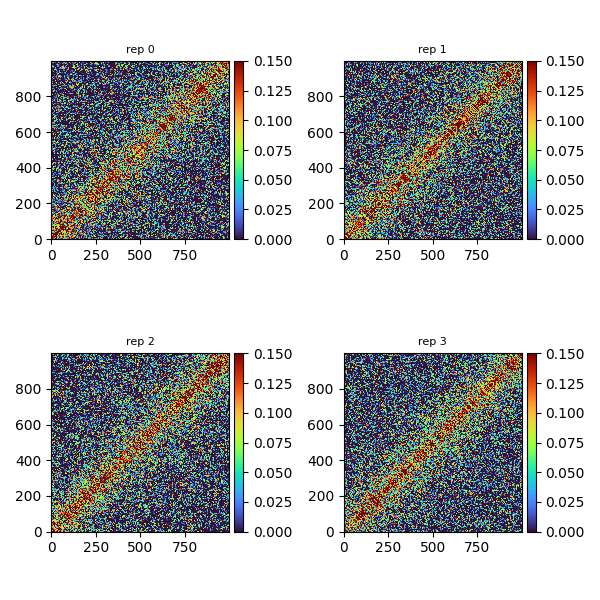

In [46]:
f, axs = plt.subplots(2,2, figsize=(6,6), tight_layout=True)
q = 1

for i in range(len(ttcs)):
    tlim = 1000
    ttc = ttcs[i,q,:tlim, :tlim]
    ax = axs.ravel()[i]
    vmin = np.mean(ttc[:500, -500:])
    ax.imshow(ttc-vmin, vmin=0, vmax=.15, origin='lower', cmap='turbo')
    ax.set_title(f'rep {i}', fontsize=8)

    divider = make_axes_locatable(ax)
    cb1 = mpl.colorbar.ColorbarBase(divider.append_axes('right', size='5%', pad=0.05), cmap=mpl.cm.turbo,  orientation='vertical', norm=mpl.colors.Normalize(vmin=0,vmax=.15)) #,
# cb1.set_label('q (µm$^{-1}$)')

In [47]:
def ttc2g2(ttc):
    g2 = []
    for k in range(ttc.shape[0]):
        g2.append(np.mean(np.diag(ttc, k=k)))
    
    return np.asarray(g2)

In [56]:
np.shape(g2s)

(4, 12, 80)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


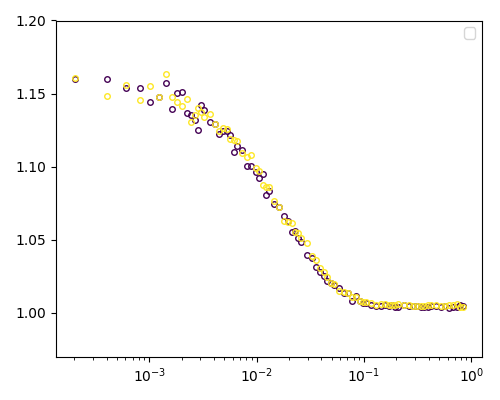

In [78]:
f, axs = plt.subplots(1,1, figsize=(5,4), tight_layout=True)
q = 1
col = plt.cm.viridis(np.linspace(0,1,len(ttcs)))
# for i in range(4):
#     ttc = ttcs[i,q,:, :]
#     g2 = ttc2g2(ttc)
    # axs.plot(ttc_time, g2, c=col[i], ls='',marker='o', ms=4, mfc='none',label=i)
axs.plot(delay, g2s[0,q+1,:], c=col[0], ls='',marker='o', ms=4, mfc='none',)#marker='o', ms=4, mfc='none',label=i)
axs.plot(delay, g2s[-1,q+1,:], c=col[-1], ls='',marker='o', ms=4, mfc='none',)#marker='o', ms=4, mfc='none',label=i)
axs.set_xscale('log')
axs.set_ylim(.97,1.2)
axs.legend()